In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("./data/ArM/5sites.xls")
df_esm = pd.read_parquet("./data/ArM/streptavidin-esm2-karim.parquet")
df_

print(df.head())
#unique values in each column
print(df.nunique())

  well  indole      OD  plate_library variant  norm_TSNAK
0   E4  0.1225  0.1079           8060   TALFQ   30.807874
1   C2  0.1436  0.1270           8057   QWNAS   19.585782
2   D7  0.1264  0.1399           8061   TAQAL   17.675834
3   C2  0.1686  0.1685           8069   TFGWR   16.727843
4  B11  0.0704  0.1209           8060   HFLSQ   15.801324
well               90
indole            667
OD               1512
plate_library      31
variant          2083
norm_TSNAK       2211
dtype: int64


In [3]:
df_esm

,_id,embedding-mean,identifier,params,seq,status,timestamp,y
0,65f982437162f0c33a9e73a1,"[0.0040577067993581295,-0.03209082782268524,-0...",features,T111T+S112A+N118L+A119F+K121Q,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,finished,1.710851e+09,1.488662
1,65f982437162f0c33a9e73a2,"[-0.002129207830876112,-0.03002290241420269,-0...",features,T111Q+S112W+N118N+A119A+K121S,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,finished,1.710851e+09,1.291941
2,65f982437162f0c33a9e73a3,"[0.0055734943598508835,-0.028331195935606956,-...",features,T111T+S112A+N118Q+A119A+K121L,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,finished,1.710851e+09,1.247380
3,65f982437162f0c33a9e73a4,"[-0.0016261062119156122,-0.02776443399488926,-...",features,T111T+S112F+N118G+A119W+K121R,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,finished,1.710851e+09,1.223440
4,65f982437162f0c33a9e73a5,"[0.002397771691903472,-0.03463907912373543,-0....",features,T111H+S112F+N118L+A119S+K121Q,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,finished,1.710851e+09,0.675085
...,...,...,...,...,...,...,...,...
15133,66cc878794bbbd2ba80a0249,"[0.001444669789634645,-0.047353848814964294,-0...",features,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,finished,1.724680e+09,0.000000
15134,66cc878794bbbd2ba80a024a,"[0.0006066097412258387,-0.046907730400562286,-...",features,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,finished,1.724680e+09,0.000000
15135,66cc878794bbbd2ba80a024b,"[-0.0015105835627764463,-0.039543986320495605,...",features,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,finished,1.724680e+09,0.000000
15136,66cc878794bbbd2ba80a024c,"[0.0022350409999489784,-0.04103218764066696,-0...",features,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,GITGTWYNQLGSTFIVTAGADGALTGTYESAVGNAESRYVLTGRYD...,finished,1.724680e+09,0.000000


In [4]:
# param = "T111H+S112F+N118L+A119S+K121Q" --> HFLSQ
def get_variant_from_params(param: str):
    return "".join([x[-1] for x in param.split("+")])
df_esm["variant"] = df_esm["params"].apply(get_variant_from_params)
# drop where no + in params
df_esm = df_esm[df_esm["params"].str.contains("\+")]

# merge the two dataframes
# df = df.merge(df_esm, left_on="variant", right_on="variant", how="inner")
df

,well,indole,OD,plate_library,variant,norm_TSNAK
0,E4,0.1225,0.1079,8060,TALFQ,30.807874
1,C2,0.1436,0.1270,8057,QWNAS,19.585782
2,D7,0.1264,0.1399,8061,TAQAL,17.675834
3,C2,0.1686,0.1685,8069,TFGWR,16.727843
4,B11,0.0704,0.1209,8060,HFLSQ,15.801324
...,...,...,...,...,...,...
2206,B12,0.0085,0.3994,8055,TPNSG,0.320542
2207,G11,0.0127,0.5953,8071,LENNL,0.275370
2208,C12,0.0032,0.3169,8072,AKFGQ,0.251572
2209,D12,0.0076,0.7620,8071,TVRKS,0.128738


variant
ACNAF    2.775399
APSSQ    0.189808
ATNAL    6.246948
CGNAF    3.203141
DRNGQ    0.349437
           ...   
TTNAG    0.374200
VRNLQ    0.217110
VVNEQ    1.090088
WVNFQ    4.225540
YTNAF    6.569080
Name: norm_TSNAK, Length: 115, dtype: float64


<Axes: title={'center': 'Relative standard deviation of TSNAK'}, xlabel='variant'>

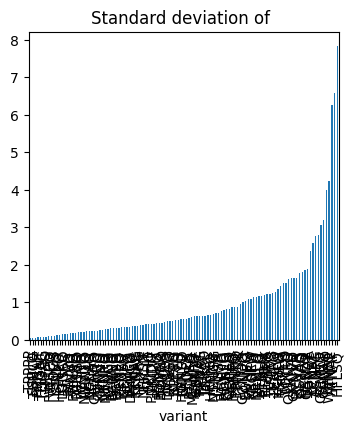

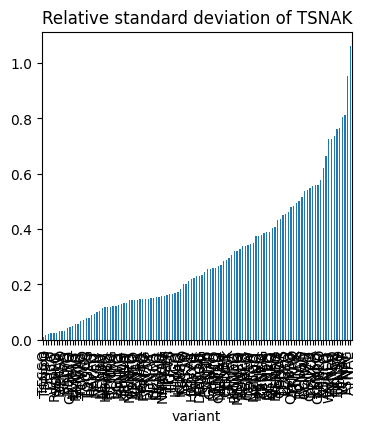

In [5]:
stds = df.groupby('variant')["norm_TSNAK"].std()
has_std = ~stds.isna()
stds[has_std]
print(stds[has_std])

means = df.groupby('variant')["norm_TSNAK"].mean()[has_std]

fig = plt.figure(figsize=(4, 4))
stds[has_std].sort_values().plot(kind='bar', title='Standard deviation of ')

fig = plt.figure(figsize=(4, 4))
rel_std = stds[has_std] / means
rel_std.sort_values().plot(kind='bar', title='Relative standard deviation of TSNAK')



In [6]:
df.columns
# Index(['well', 'indole', 'OD', 'plate_library', 'variant', 'norm_TSNAK', 'row',
    #    'col', 'crow', 'ccol', 'dist'],
    #   dtype='object')

Index(['well', 'indole', 'OD', 'plate_library', 'variant', 'norm_TSNAK'], dtype='object')

3.5 5.5


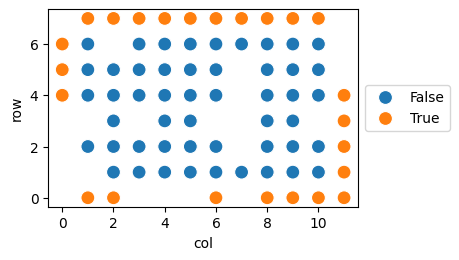

In [7]:
#convert well to row and column eg E4 -> 5, 4

def well_to_row_col(well):
    row = ord(well[0]) - ord('A')
    col = int(well[1:]) - 1
    return row, col

df['row'], df['col'] = zip(*df['well'].map(well_to_row_col))

#add little bit of noise to row and col
# df['row'] += np.random.normal(0, 0.1, size=len(df))
# df['col'] += np.random.normal(0, 0.1, size=len(df))


center_row = df['row'].unique().mean()
center_col = df['col'].unique().mean()
print(center_row, center_col)

df['crow'] = df['row'] - center_row
df['ccol'] = df['col'] - center_col

# df['dist'] = np.sqrt(df['crow']**2 + df['ccol']**2)
#manhattan distance
df['dist'] = np.abs(df['crow']) + np.abs(df['ccol'])

#dist_c_row
df['dist_c_row'] = np.abs(df['crow'])
#dist_c_col
df['dist_c_col'] = np.abs(df['ccol'])

df["border"] = (df["dist_c_row"] > 3 ) | ( df["dist_c_col"] > 5)
fig = plt.figure(figsize=(4, 4))


df_pl = df[df['plate_library'] == df['plate_library'][4]]

sns.scatterplot(x='col', y='row', hue='border', data=df_pl, s=100)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [8]:
df

,well,indole,OD,plate_library,variant,norm_TSNAK,row,col,crow,ccol,dist,dist_c_row,dist_c_col,border
0,E4,0.1225,0.1079,8060,TALFQ,30.807874,4,3,0.5,-2.5,3.0,0.5,2.5,False
1,C2,0.1436,0.1270,8057,QWNAS,19.585782,2,1,-1.5,-4.5,6.0,1.5,4.5,False
2,D7,0.1264,0.1399,8061,TAQAL,17.675834,3,6,-0.5,0.5,1.0,0.5,0.5,False
3,C2,0.1686,0.1685,8069,TFGWR,16.727843,2,1,-1.5,-4.5,6.0,1.5,4.5,False
4,B11,0.0704,0.1209,8060,HFLSQ,15.801324,1,10,-2.5,4.5,7.0,2.5,4.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,B12,0.0085,0.3994,8055,TPNSG,0.320542,1,11,-2.5,5.5,8.0,2.5,5.5,True
2207,G11,0.0127,0.5953,8071,LENNL,0.275370,6,10,2.5,4.5,7.0,2.5,4.5,False
2208,C12,0.0032,0.3169,8072,AKFGQ,0.251572,2,11,-1.5,5.5,7.0,1.5,5.5,True
2209,D12,0.0076,0.7620,8071,TVRKS,0.128738,3,11,-0.5,5.5,6.0,0.5,5.5,True


In [9]:
df.columns
# ['well', 'indole', 'OD', 'plate_library', 'variant', 'norm_TSNAK', '_id',
#        'embedding-mean', 'identifier', 'params', 'seq', 'status', 'timestamp',
#        'y', 'row', 'col', 'crow', 'ccol', 'dist', 'dist_c_row', 'dist_c_col',
#        'border', 'mean_norm_TSNAK', 'std_norm_TSNAK', 'rel_std_norm_TSNAK',
#        'std_high'],


Index(['well', 'indole', 'OD', 'plate_library', 'variant', 'norm_TSNAK', 'row',
       'col', 'crow', 'ccol', 'dist', 'dist_c_row', 'dist_c_col', 'border'],
      dtype='object')

In [10]:
stds = df.groupby('variant')["norm_TSNAK"].transform('std')
has_std = ~stds.isna()

# means = df.groupby('variant')["norm_TSNAK"].transform('mean')[has_std]
# rel_std = stds[has_std] / means

# df['mean_norm_TSNAK'] = means
# df['std_norm_TSNAK'] = stds
# df['rel_std_norm_TSNAK'] = rel_std

# # std > 1.1
# df['std_high'] = df['std_norm_TSNAK'] > df['std_norm_TSNAK'].quantile(0.8)
df['bigOD'] = df['OD'] > 0.019

# df_duplicates = df.dropna()
# df_duplicates


In [11]:


# #drop non numeric columns
# df_numeric = df.drop(columns=['well', 'variant', 'row', 'col', 'crow', 'ccol', 'identifier', 'params', 'seq', 'status', 'timestamp', 'y', '_id', 'plate_library', 'embedding-mean'])
# #tsne plot of embedding-mean
# from sklearn.manifold import TSNE
# if isinstance(df['embedding-mean'][0], str):
#     df['embedding-mean'] = df['embedding-mean'].apply(eval)
# X = np.array(df['embedding-mean'].tolist())

# # X_embedded = TSNE(n_components=2, learning_rate='auto',
# #                   init='random', perplexity=30).fit_transform(X)
# # X_embedded.shape

# import umap
# reducer = umap.UMAP()
# X_embedded = reducer.fit_transform(X)


In [12]:
df[(df["row"] == 1) & (df["col"] == 1)]

,well,indole,OD,plate_library,variant,norm_TSNAK,row,col,crow,ccol,dist,dist_c_row,dist_c_col,border,bigOD
325,B2,0.0726,0.1379,7790,TAFTC,5.145725,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True
359,B2,0.0646,0.1761,8062,NFESQ,4.983753,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True
361,B2,0.0486,0.1471,8055,HFNPL,4.976205,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True
377,B2,0.0482,0.1651,8069,MRHIQ,4.880701,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True
487,B2,0.0636,0.1335,8128,TYNWG,4.351166,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True
558,B2,0.0531,0.3020,8059,VVNEQ,4.100579,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True
599,B2,0.0238,0.1492,8072,ILWSQ,3.974136,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True
677,B2,0.0468,0.2861,8075,TSCRP,3.694796,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True
805,B2,0.0384,0.1494,8071,TNVFQ,3.317639,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True
891,B2,0.0618,0.2768,8058,TVPNQ,3.116902,1,1,-2.5,-4.5,7.0,2.5,4.5,False,True


In [13]:
border_ratio = df["border"].mean()
border_ratio
# sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=df['std_norm_TSNAK'])


0.3274536408864767

0

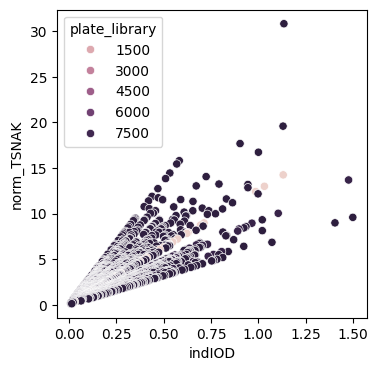

In [14]:
df["indIOD"] = df["indole"] / df["OD"]

df["col0"] = df["col"] == 0

#plot indIOD vs norm_TSNAK
fig = plt.figure(figsize=(4, 4))
sns.scatterplot(x='indIOD', y='norm_TSNAK', hue='plate_library', data=df)

len(df[df["variant"] == "TSNAK"])


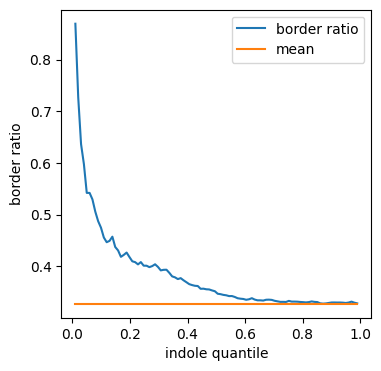

In [15]:
meta_data = "border"
prop = "indole"
quant = lambda q: df[df[prop] < df[prop].quantile(q)][meta_data].mean()

#plot border ratio for different quantiles of OD
fig = plt.figure(figsize=(4, 4))
qs = np.linspace(0.01, 0.99, 100)
border_ratios = [quant(q) for q in qs]
plt.plot(qs, border_ratios)
#constant border ratio
plt.plot(qs, [df[meta_data].mean()] * len(qs))
plt.xlabel(f'{prop} quantile')
plt.ylabel(f'{meta_data} ratio')
plt.legend([f'{meta_data} ratio', 'mean'])


Text(0, 0.5, 'counts per variant')

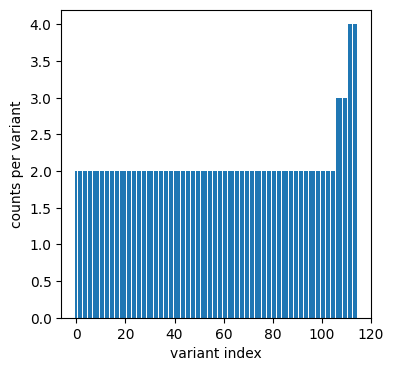

In [16]:
# sorted histogram of variant counts
fig = plt.figure(figsize=(4, 4))
variant_counts = df["variant"].value_counts()
varcounts = variant_counts[variant_counts > 1].sort_values()
# x axis cumulated counts
plt.bar(np.arange(len(varcounts)), varcounts)
plt.xlabel('variant index')
plt.ylabel('counts per variant')

<Axes: xlabel='variant', ylabel='indole'>

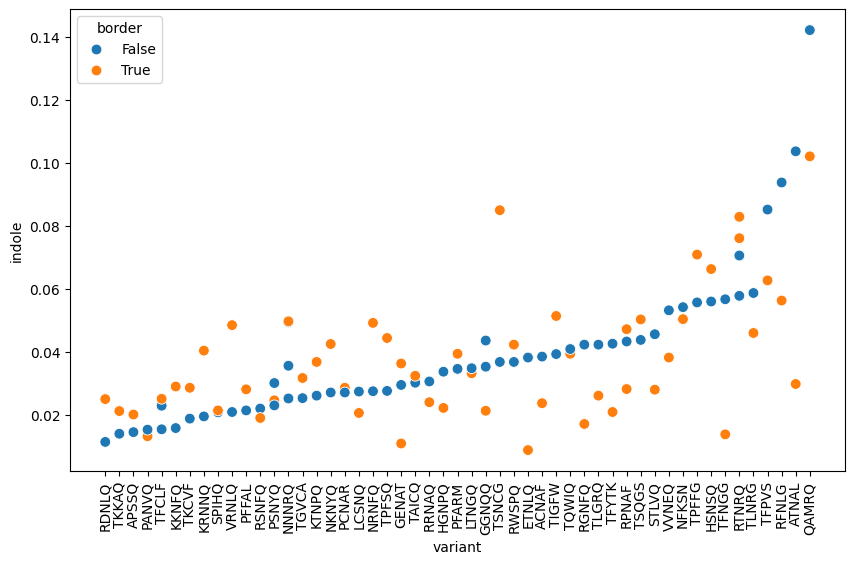

In [17]:
# check if if some variants have both measurements on the border and in the center

# only multiple measurements

border_by_variant = df.groupby('variant')['border'].mean()

# mean not 0 or 1
variant_series = border_by_variant[(border_by_variant > 0) & (border_by_variant < 1)]
variant_series

prop = "indole"
sus_df = df[df["variant"].isin(variant_series.index)]
order_df_by_non_border_norm_TSNAK = sus_df[ ~sus_df["border"]].sort_values(prop)
variant_ordered_series = order_df_by_non_border_norm_TSNAK["variant"]

#sort full sus_df by variant_ordered_series
sus_df = sus_df.set_index("variant").loc[variant_ordered_series].reset_index()


fig = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
# #vertical lines connecting the variants
sns.scatterplot(x='variant', y=prop, hue='border', data=sus_df, s=60)
# plt.scatter(order_df_by_non_border_norm_TSNAK["variant"], order_df_by_non_border_norm_TSNAK[prop])


#vertical x labels
    




# #plot variant on x axis indole on y axis color by border
# # fig = plt.figure(figsize=(4, 4))


In [18]:

# import pygwalker as pyg

# pyg.walk(df)

In [19]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

# df_numeric = df[['norm_TSNAK', 'dist', 'dist_c_row', 'dist_c_col', 'border', 'mean_norm_TSNAK', 'std_norm_TSNAK', 'rel_std_norm_TSNAK', 'std_high']]
df["invOD"] = 1/df["OD"]
df['plate_library'] = df['plate_library'].astype("category")
# df.dropna(inplace=True)

df["col"] = df["col"].astype("category")
df["dist"] = df["dist"].astype("category")

fig = px.scatter_matrix(df,
    dimensions=['norm_TSNAK', 'OD', 'indole', "invOD", "row", "col"],
    color="plate_library",
    # size="mean_norm_TSNAK",
    hover_data=['variant', 'border', 'row', 'col'],
    
    )

fig.update_layout(
    hoversubplots="axis",
    width=1000,
    height=1000,
    hovermode="closest",
    font=dict(
        size=6,
    )
)



#show in browser
fig.show()
# sns.pairplot(df_numeric)
# #correlation matrix
# corr = df_numeric.corr()
# # #render as table html
# corr.style.background_gradient(cmap='coolwarm')